In [1]:
# Mount  Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical


# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

# Create the modified model
model = Sequential()

# Convolutional input layer, 32 feature maps with a size of 3×3, and a rectifier activation function.
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.2))

# Convolutional layer, 32 feature maps with a size of 3×3 and a rectifier activation function.
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=MaxNorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function.
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.2))

# Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function.
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=MaxNorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer, 128 feature maps with a size of 3×3 and a rectifier activation function.
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.2))

# Convolutional layer, 128 feature maps with a size of 3×3 and a rectifier activation function.
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=MaxNorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.2))

# Fully connected layer with 1024 units and a rectifier activation function.
model.add(Dense(1024, activation='relu', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.2))

# Fully connected layer with 512 units and a rectifier activation function.
model.add(Dense(512, activation='relu', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.2))

# Fully connected output layer with 10 units and a Softmax activation function.
model.add(Dense(num_classes, activation='softmax'))

# Compile model
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(learning_rate=lrate, momentum=0.9, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

print(model.summary())

# Train the model
# Uncomment the line below to train in Colab
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)


# Evaluate the model
# Uncomment the lines below to evaluate in Colab
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 dropout_6 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 dropout_7 (Dropout)         (None, 16, 16, 64)        0         
                                                      

In [6]:
import numpy as np

# Predict the first 4 images
predictions = model.predict(X_test[:4])

# Convert predictions from one-hot encoded to label indices
predicted_classes = np.argmax(predictions, axis=1)

# Convert actual labels from one-hot encoded to label indices
actual_classes = np.argmax(y_test[:4], axis=1)

# Print the results
for i in range(4):
    print(f"IMAGE {i+1}:")
    print(f"PREDICTED CLASS: {predicted_classes[i]}, ACTUAL CLASS: {actual_classes[i]}")
    if predicted_classes[i] == actual_classes[i]:
        print("PREDICTION IS CORRECT!")
    else:
        print("PREDICTION IS INCORRECT!")
    print("----------------------")


1/1 [==============================] - 0s 94ms/step
IMAGE 1:
PREDICTED CLASS: 3, ACTUAL CLASS: 3
PREDICTION IS CORRECT!
----------------------
IMAGE 2:
PREDICTED CLASS: 8, ACTUAL CLASS: 8
PREDICTION IS CORRECT!
----------------------
IMAGE 3:
PREDICTED CLASS: 8, ACTUAL CLASS: 8
PREDICTION IS CORRECT!
----------------------
IMAGE 4:
PREDICTED CLASS: 0, ACTUAL CLASS: 0
PREDICTION IS CORRECT!
----------------------


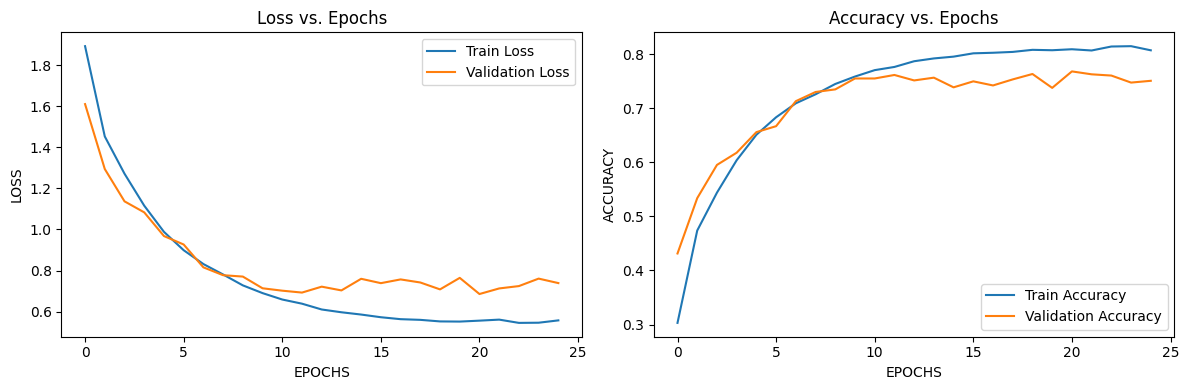

In [8]:
import matplotlib.pyplot as plt

# Plotting the Loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.legend()

# Plotting the Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.legend()

plt.tight_layout()
plt.show()
